# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

cities=cities[0:501]
len(cities)
print(weather_api_key)

5e4d1ad8d0b43ddedc7096855b8230a9


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities[14]
response=requests.get(base_url).json()
response

NameError: name 'base_url' is not defined

In [5]:
base_url=f"http://api.openweathermap.org/data/2.5/weather?q={cities[50]}&appid={weather_api_key}"
response=requests.get(base_url).json()
response
#City Lat Lng Max Temp Humidity Cloudiness Wind Speed Country Date
df=pd.DataFrame({'City': [], "Lat":[], "Lng":[], "temp_max":[], "Humidity": [], "Cloudiness": [], "Wind_speed":[],
                 "Country" : [], "Date":[]})
df.City=cities
i=1
df.iloc[i, 1]
df.head()

,City,Lat,Lng,temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
0,butaritari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,belushya guba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alugan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mataura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ushuaia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df.head()
i=40
url=f"http://api.openweathermap.org/data/2.5/weather?q={df.loc[i, 'City']}&appid={weather_api_key}"
response=requests.get(url).json()
len(response)
#{'cod': '404', 'message': 'city not found'}

13

In [7]:
for i, row in df.iterrows(): 
    url=f"http://api.openweathermap.org/data/2.5/weather?q={df.loc[i,'City']}&appid={weather_api_key}"
    print(df.loc[i, 'City'])
    response=requests.get(url).json()
    if len(response)==13:
        df.loc[i, 'Lat']=response['coord']['lat']
        df.loc[i, 'Lng']=response['coord']['lon']
        df.loc[i, 'temp_max']=response['main']['temp']
        df.loc[i, 'Humidity']=response['main']['humidity']
        df.loc[i, 'Cloudiness']=response['clouds']['all']
        df.loc[i, 'Wind_speed']=response['wind']['speed']
        df.loc[i, 'Country']=response['sys']['country']
        df.loc[i, 'Date']=response['dt']
    else:
        continue 
  

butaritari
belushya guba
alugan
mataura
ushuaia
mys shmidta
rikitea
ahipara
vaini
bluff
grindavik
coahuayana
bereda
hasaki
saint george
victoria
sampit
hilo
cervo
meulaboh
belen
ballina
bredasdorp
severnoye
lagoa
hay river
busselton
lensk
east london
khatanga
kapaa
nizhniy tsasuchey
komsomolskiy
axim
kargasok
roma
hermanus
madimba
hobart
taolanaro
guerrero negro
puerto ayora
vestmanna
bathsheba
puerto carreno
henties bay
port lincoln
genhe
quatre cocos
cidreira
moyale
juneau
albany
barentsburg
kalmunai
cabo san lucas
longyearbyen
almaznyy
san quintin
dikson
san julian
marsabit
lolua
tolaga bay
lebu
punta arenas
denpasar
yellowknife
boyuibe
fort saint john
virginia beach
okhotsk
ostrovnoy
luderitz
kavieng
cape town
zambezi
grants
praia da vitoria
chokurdakh
pozo colorado
hithadhoo
souillac
nikolskoye
abilene
georgetown
chambersburg
hamilton
sumbawa
hobyo
ouargaye
jiayuguan
zapolyarnyy
faanui
kaniama
tasiilaq
zabol
saint-pierre
usta muhammad
chuy
paamiut
dwarka
bambous virieux
lompoc
iqa

In [13]:
df.head()

df=df.dropna(axis=0, how='any')
df

,City,Lat,Lng,temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
2,alugan,12.22,125.48,301.41,76.0,100.0,2.63,PH,1.595989e+09
3,mataura,-46.19,168.86,283.68,65.0,100.0,2.60,NZ,1.595989e+09
4,ushuaia,-54.80,-68.30,275.15,80.0,40.0,9.30,AR,1.595989e+09
6,rikitea,-23.12,-134.97,295.66,81.0,1.0,6.16,PF,1.595989e+09
7,ahipara,-35.17,173.17,288.38,67.0,100.0,5.16,NZ,1.595989e+09
...,...,...,...,...,...,...,...,...,...
496,great yarmouth,52.61,1.73,283.76,91.0,0.0,6.08,GB,1.595989e+09
497,cookeville,36.16,-85.50,297.18,88.0,75.0,0.41,US,1.595989e+09
498,grand-lahou,5.14,-5.02,295.81,91.0,76.0,2.99,CI,1.595989e+09
499,ostersund,63.18,14.64,285.15,100.0,100.0,5.70,SE,1.595989e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
df=df.loc[df['Humidity']<=100]
pd.set_option('display.max_row', None)

df.head()


,City,Lat,Lng,temp_max,Humidity,Cloudiness,Wind_speed,Country,Date
2,alugan,12.22,125.48,301.41,76.0,100.0,2.63,PH,1.595989e+09
3,mataura,-46.19,168.86,283.68,65.0,100.0,2.60,NZ,1.595989e+09
4,ushuaia,-54.80,-68.30,275.15,80.0,40.0,9.30,AR,1.595989e+09
6,rikitea,-23.12,-134.97,295.66,81.0,1.0,6.16,PF,1.595989e+09
7,ahipara,-35.17,173.17,288.38,67.0,100.0,5.16,NZ,1.595989e+09


In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
# Extract relevant fields from the data frame
df.to_csv('clean_city_date.csv')

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

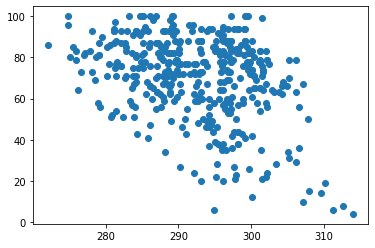

In [18]:
plt.scatter(df['temp_max'], df['Humidity'])

## Latitude vs. Humidity Plot

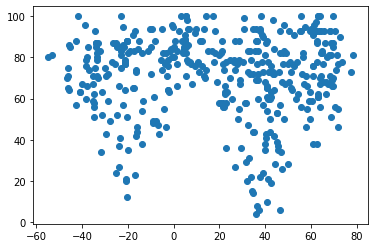

In [19]:
plt.scatter(df['Lat'], df['Humidity'])

## Latitude vs. Cloudiness Plot

Text(6, 10, 'y = 0.16x + 40.55')

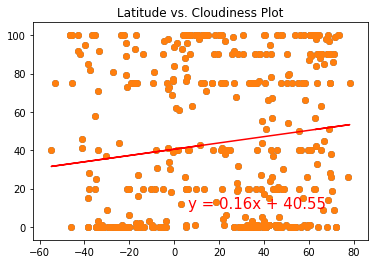

In [27]:
plt.scatter(df['Lat'], df['Cloudiness'])
plt.title('Latitude vs. Cloudiness Plot')
(slope, intercept, rvalue, pvalue, stderr) = linregress(df['Lat'], df['Cloudiness'])
regress_values = df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(df['Lat'], df['Cloudiness'])
plt.plot(df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

## Latitude vs. Wind Speed Plot

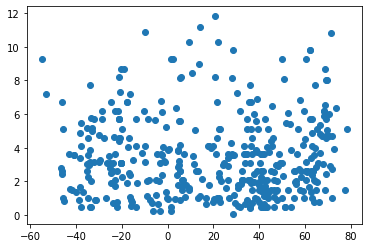

In [66]:
plt.scatter(df['Lat'], df['Wind_speed'])

## Linear Regression

In [67]:
# OPTIONAL: Create a function to create Linear Regression plots
def linReg(x_values, y_values, xlab, ylab): 

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

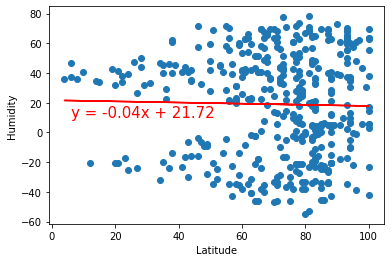

In [68]:
# Create Northern and Southern Hemisphere DataFrames
southDf=df.loc[df['Lat']<0]
northDf=df.loc[df['Lat']>0]
linReg(df['Humidity'],df['Lat'], 'Latitude', 'Humidity')



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

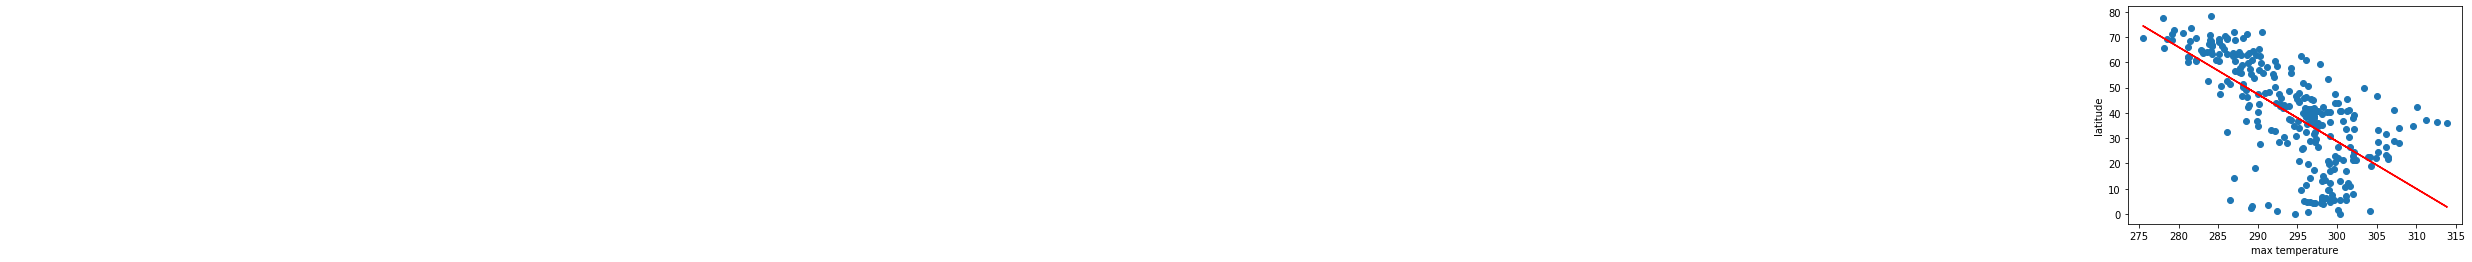

In [69]:
linReg(northDf['temp_max'], northDf['Lat'], 'max temperature', 'latitude')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

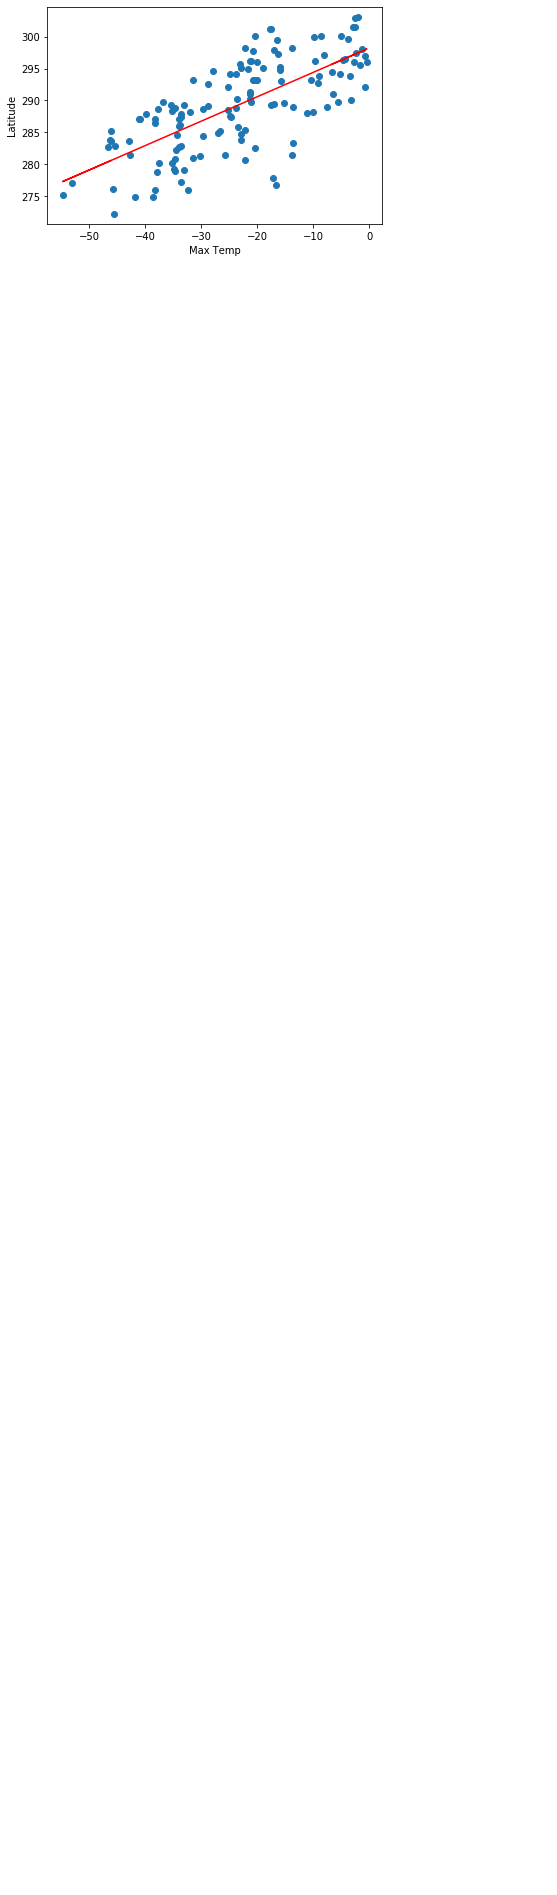

In [70]:
linReg(southDf['Lat'], southDf['temp_max'], 'Max Temp', 'Latitude')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

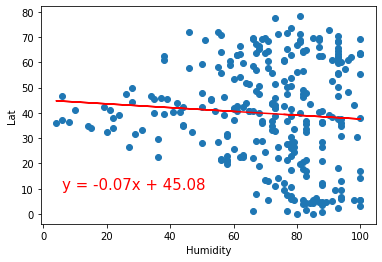

In [71]:
linReg(northDf.Humidity, northDf.Lat, 'Humidity', 'Lat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

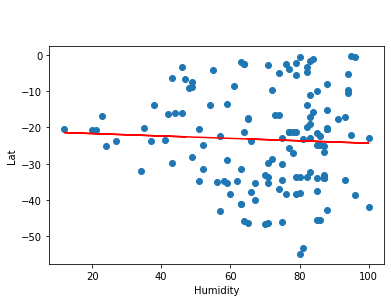

In [72]:
linReg(southDf.Humidity, southDf.Lat, 'Humidity', 'Lat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

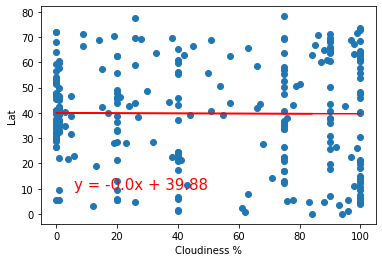

In [73]:
linReg(northDf.Cloudiness, northDf.Lat, 'Cloudiness %', 'Lat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

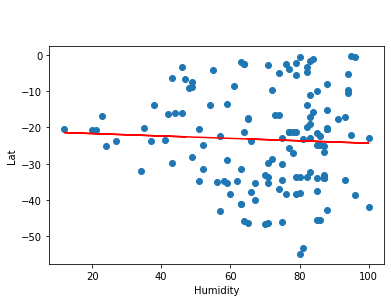

In [74]:
linReg(southDf.Humidity, southDf.Lat, 'Humidity', 'Lat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

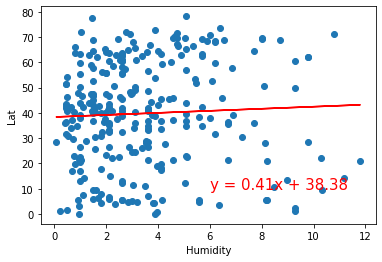

In [75]:
linReg(northDf.Wind_speed, northDf.Lat, 'Humidity', 'Lat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

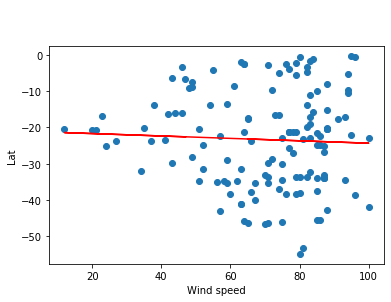

In [76]:
linReg(southDf.Humidity, southDf.Lat, 'Wind speed', 'Lat')